<a href="https://colab.research.google.com/github/isque03/deeplearning_colab/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
#print(x)
x = tf.zeros(shape=(2,1))
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)
v.assign(tf.ones((3,1)))
v.assign_add(tf.ones((3,1)))
print(v)
a = tf.ones((2,2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d
print(b)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.55103195],
       [ 0.7092247 ],
       [-0.370547  ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [6]:
from numpy.lib.function_base import gradient
time = tf.Variable(initial_value=0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position,time)
acceleration = outer_tape.gradient(speed,time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


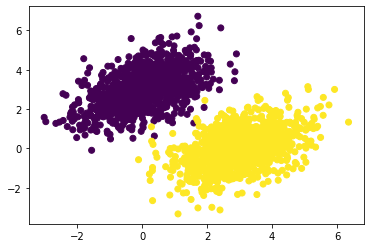

In [7]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]],size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0],cov=[[1,0.5],[0.5,1]],size=num_samples_per_class)
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),
                     np.ones((num_samples_per_class,1),dtype="float32")))
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [11]:
# create linear classifier (prediction = W * input + b)
# create variables initialized with random values, zeros
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
# inputs are 2d points
# output are a single csore per sample between 0 and 1

def model(inputs):
  """
  The forward pass function
  """
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  """
  Calculate the squared loss
  """
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

  